Q1: Create the following training datasets from the optdigits.tra set: 
X25: Randomly chosen N=25 instances from each class. 
X100:  Randomly chosen N=100 instances from each class. 


In [21]:
import numpy as np
import pandas as pd
from pandas import DataFrame, read_csv, to_numeric
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from six import StringIO

from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz


from lightgbm import LGBMClassifier



import math
import warnings
warnings.filterwarnings("ignore")

In [22]:
# setting header = None here to get the column names as in order starting from 0

train_data = read_csv(r'/media/anuja/study/Anuja/MS/githubLibraries/MLprojects/Assignment3/optdigits.tra', sep=",",header=None)
train_data



,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,0,0,5,13,11,2,0,0,0,2,...,0,0,0,8,13,15,10,1,0,9
3819,0,0,0,1,12,1,0,0,0,0,...,0,0,0,0,4,9,0,0,0,4
3820,0,0,3,15,0,0,0,0,0,0,...,0,0,0,4,14,16,9,0,0,6
3821,0,0,6,16,2,0,0,0,0,0,...,0,0,0,5,16,16,16,5,0,6


In [23]:
test_data= read_csv(r'/media/anuja/study/Anuja/MS/githubLibraries/MLprojects/Assignment3/optdigits.tes', sep=",",header=None)
test_data

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1793,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1794,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1795,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [24]:
# create dataset of 25 instances of each class and 100 instances of each class

classes = 10
X25_train = train_data[train_data[64] == 0].sample(25)
X100_train = train_data[train_data[64] == 0].sample(100)

for i in range(1,classes,1):

    X25_train = X25_train.append(train_data[train_data[64] == i].sample(25), ignore_index = True)
    X100_train = X100_train.append(train_data[train_data[64] == i].sample(100), ignore_index= True)


In [25]:
# get the X_train and Y_train

X_train_25 = X25_train.iloc[:,0:64]
Y_train_25 = X25_train.iloc[:,64];  #classification or label column

X_train_100 = X100_train.iloc[:,0:64]
Y_train_100 = X100_train.iloc[:,64];

X_test = test_data.iloc[:,0:64]
Y_test = test_data.iloc[:,64]
# X_test = test_data[test_data.columns[0:64]]
# Y_test = test_data[test_data.columns[64]]

print(X_test.shape)
print(Y_test.shape)
print(type(X_test))
print(type(Y_test))


(1797, 64)
(1797,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Q2: Decision Trees, classification: Use library sklearn.tree.DecisionTreeClassifier algorithm. For the DecisionTreeClassifier determine the value of the tree depth parameter (experiment with depth=2, 3, 5, 10) that results in the best test error. Report the training and test errors for each depth value and the training set. How does the best depth value change as the number of instances change? Note: Check the depth of the your trained decision tree, by e.g. plotting the tree.

Results with 25 instances
                Training Error  Test Error
Max_Depth = 2            0.708    0.724541
Max_Depth = 3            0.576    0.631608
Max_Depth = 5            0.272    0.396772
Max_Depth = 10           0.004    0.317752

Results with 100 instances
                Training Error  Test Error
Max_Depth = 2            0.705    0.702282
Max_Depth = 3            0.588    0.623261
Max_Depth = 5            0.314    0.391764
Max_Depth = 10           0.018    0.234279


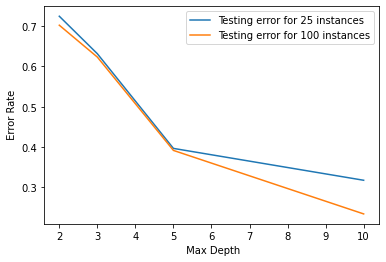

In [26]:
TrainingError_25 = []
TestingError_25=[]

TrainingError_100 = []
TestingError_100=[]
index=[]

#storing the max_depth parameters in a list
mdepth=[2,3,5,10]
#train with 25 instances from each class


for i in mdepth:
        model = DecisionTreeClassifier(max_depth=i)
        model.fit(X_train_25,Y_train_25)
        a1=model.score(X_train_25,Y_train_25)
        a2=model.score(X_test,Y_test)
        TrainingError_25.append(1-a1)
        TestingError_25.append(1-a2)

#train with 100 instances from each class

for i in mdepth:
        model = DecisionTreeClassifier(max_depth=i)
        model.fit(X_train_100,Y_train_100)
        y_pred = model.predict(X_train_100)
        y_pred1= model.predict(X_test)
        x1=accuracy_score(Y_train_100,y_pred)
        x2=accuracy_score(Y_test,y_pred1)
        TrainingError_100.append(1-x1)
        TestingError_100.append(1-x2)
        temp = 'Max_Depth = '+str(i)
        index.append(temp)

columns = ['Training Error','Test Error']

Error_list_25=[]
Error_list_100=[]
for i in range(len(TrainingError_25)):
    Error_list_25.append([TrainingError_25[i],TestingError_25[i]])
    Error_list_100.append([TrainingError_100[i],TestingError_100[i]] )
    
print("Results with 25 instances")   
df_train_error_25 = pd.DataFrame(Error_list_25,columns=columns,index=index)
print(df_train_error_25.head(20)) 

print()
print("Results with 100 instances")   
df_train_error_100 = pd.DataFrame(Error_list_100,columns=columns,index=index)
print(df_train_error_100.head(20))

#Plotting the Graph showing how training and testing errors vary for number of instances
plt.plot(mdepth,TestingError_25,label='Testing error for 25 instances')
plt.plot(mdepth,TestingError_100,label='Testing error for 100 instances')
plt.legend()
plt.xlabel(' Max Depth')
plt.ylabel(' Error Rate')

plt.show()



Plotting the Decision Tree

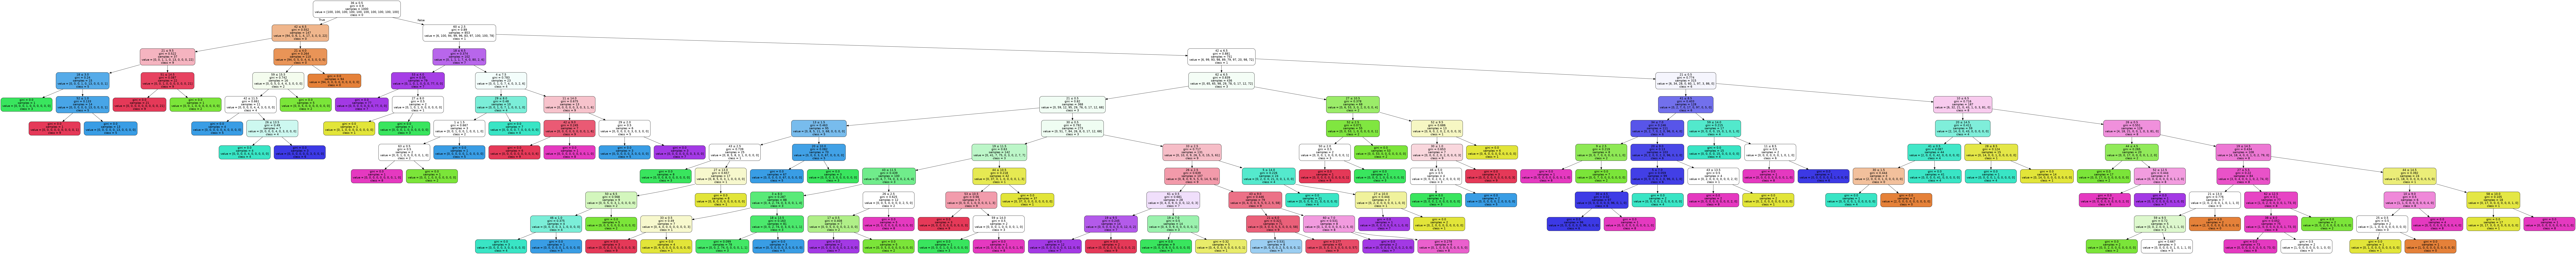

In [27]:
# for visualization of decision tree
# discarding classification or label column to get all feature names
train_data = read_csv(r'/media/anuja/study/Anuja/MS/githubLibraries/MLprojects/Assignment3/optdigits.tra', sep=",",header=None)
train_data = train_data.iloc[:, :-1]
feature_names = train_data.columns


# importing necessary libraries to draw tree 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_names,class_names=['0','1','2','3','4',
                                                                                         '5','6','7','8','9'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('optdigits.png')
Image(graph.create_png())

Q3:Repeat Q1 using XGBoost and LightGBM algorithms. Experiment with at least 5 different parameter settings to see their effect on training and test errors. How do best parameters change as the #training instances change?

In [28]:
#XGBOOST
print("************ XGBOOST ALGORITHM *************")

print()
print("For 25 random instances")
print()
learning_rate= [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] 
max_depth= [3, 4, 5, 6, 8, 10, 12, 15]
min_child_weight =[1, 3, 4, 5,7]
 #The value should be less than 1
gamma = [0.0, 0.1, 0.2 , 0.3, 0.4 ]
 #The value should be less than 1
colsample_bytree = [0.3,0.4,0.5,0.6,0.7]

warnings.filterwarnings("ignore")


    
for i in range(1,6,1):
    xgb = XGBClassifier(learning_rate=learning_rate[i-1],max_depth=max_depth[i-1],
                        min_child_weight=min_child_weight[i-1],gamma=gamma[i-1],
                        colsample_bytree=colsample_bytree[i-1],eval_metric='mlogloss')
    xgb.fit(X_train_25,Y_train_25)
    print("The training error of 25 random instances using SET"+str(i)+"parameters ",1-xgb.score(X_train_25,Y_train_25))
    print("The testing error of 25 random instances using SET"+str(i)+" parameters ",1-xgb.score(X_test,Y_test))
print()
print("For 100 random instances")
print()   
for i in range(1,6,1):
    xgb = XGBClassifier(learning_rate=learning_rate[i-1],max_depth=max_depth[i-1],
                        min_child_weight=min_child_weight[i-1],colsample_bytree=colsample_bytree[i-1],
                       eval_metric='mlogloss')
    xgb.fit(X_train_100,Y_train_100)
    print("The training error of 100 random instances using SET"+str(i)+"parameters ",1-xgb.score(X_train_100,Y_train_100))
    print("The testing error of 100 random instances using SET"+str(i)+" parameters ",1-xgb.score(X_test,Y_test))    
    

************ XGBOOST ALGORITHM *************

For 25 random instances

The training error of 25 random instances using SET1parameters  0.0
The testing error of 25 random instances using SET1 parameters  0.09293266555370061
The training error of 25 random instances using SET2parameters  0.0
The testing error of 25 random instances using SET2 parameters  0.11018363939899833
The training error of 25 random instances using SET3parameters  0.0
The testing error of 25 random instances using SET3 parameters  0.12465219810795769
The training error of 25 random instances using SET4parameters  0.0
The testing error of 25 random instances using SET4 parameters  0.13522537562604342
The training error of 25 random instances using SET5parameters  0.01200000000000001
The testing error of 25 random instances using SET5 parameters  0.15080690038953815

For 100 random instances

The training error of 100 random instances using SET1parameters  0.0030000000000000027
The testing error of 100 random instanc

In [29]:
#LIGHTBGM
print("************ LIGHTBGM ALGORITHM *************")
print()
print("For 25 random instances")
print()
learning_rate= [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] 
max_depth= [3, 4, 5, 6, 8, 10, 12, 15]
min_child_weight =[1, 3, 4, 5,7]
 #The value should be less than 1
reg_alpha = [0.0, 0.1, 0.2 , 0.3, 0.4 ]
 #The value should be less than 1
colsample_bytree = [0.3,0.4,0.5,0.6,0.7]

for i in range(1,6,1):
    lgb = LGBMClassifier(learning_rate=learning_rate[i-1],max_depth=max_depth[i-1],min_child_weight=min_child_weight[i-1],reg_alpha=reg_alpha[i-1],colsample_bytree=colsample_bytree[i-1])
    lgb.fit(X_train_25,Y_train_25)
    print("The training error of 25 random instances using SET"+str(i)+"parameters ",1-lgb.score(X_train_25,Y_train_25))
    print("The testing error of 25 random instances using SET"+str(i)+" parameters ",1-lgb.score(X_test,Y_test))
print("******************************")    
print()
print("For 100 random instances")
print()
for i in range(1,6,1):
    lgb = LGBMClassifier(learning_rate=learning_rate[i-1],max_depth=max_depth[i-1],min_child_weight=min_child_weight[i-1],reg_alpha=reg_alpha[i-1],colsample_bytree=colsample_bytree[i-1])
    lgb.fit(X_train_100,Y_train_100)
    print("The training error of 100 random instances using SET"+str(i)+"parameters ",1-lgb.score(X_train_100,Y_train_100))
    print("The testing error of 100 random instances using SET"+str(i)+" parameters ",1-lgb.score(X_test,Y_test)) 



************ LIGHTBGM ALGORITHM *************

For 25 random instances

The training error of 25 random instances using SET1parameters  0.0
The testing error of 25 random instances using SET1 parameters  0.1062882582081246
The training error of 25 random instances using SET2parameters  0.0040000000000000036
The testing error of 25 random instances using SET2 parameters  0.12520868113522543
The training error of 25 random instances using SET3parameters  0.008000000000000007
The testing error of 25 random instances using SET3 parameters  0.15136338341680577
The training error of 25 random instances using SET4parameters  0.01200000000000001
The testing error of 25 random instances using SET4 parameters  0.1552587646076795
The training error of 25 random instances using SET5parameters  0.028000000000000025
The testing error of 25 random instances using SET5 parameters  0.1519198664440734
******************************

For 100 random instances

The training error of 100 random instances us

Q4: Multilayer Perceptrons: classification Use library sklearn.neural_network.MLPClassifier. For the neural network (MLP) determine the value of the best hidden_layer_sizes (experiment with 1 and 2 hidden layers and 2, 5, 10 hidden units in each layer) that results in the best test error for each of the training data sets you created.

In [38]:
from sklearn.neural_network import MLPClassifier

# experiment with 1 and 2 hidden layers and 2, 5, 10 hidden units in each layer
layers = [1,2]
hidden_units = [2,5,10]
trainError_25_layer1 = []
testError_25_layer1 =[]
trainError_100_layer1 = []
testError_100_layer1 =[]

trainError_25_layer2 = []
testError_25_layer2 =[]
trainError_100_layer2 = []
testError_100_layer2 =[]
index = []
columns = ['Training Error','Testing Error']

# for layer 1
layers = 1
for units in hidden_units:

        clf1 = MLPClassifier( alpha=1e-5,max_iter=10000, hidden_layer_sizes=(units,), random_state=1)
        clf1.fit(X_train_25, Y_train_25)
        trainError_25_layer1.append(1 - clf1.score((X_train_25),(Y_train_25)))
        testError_25_layer1.append(1 - clf1.score(X_test,Y_test))
        
        clf2 = MLPClassifier(alpha=1e-5, max_iter=10000,hidden_layer_sizes=(units,), random_state=1)
        clf2.fit(X_train_100, Y_train_100)
        trainError_100_layer1.append(1 - clf2.score((X_train_100),(Y_train_100)))
        testError_100_layer1.append(1 - clf2.score(X_test,Y_test))
        index.append('Hidden Units = '+str(units))

# for layers 2
layers = 2
for units in hidden_units:

        clf1 = MLPClassifier(alpha=1e-5, max_iter=10000, hidden_layer_sizes=(units,units), random_state=1)
        clf1.fit(X_train_25, Y_train_25)
        trainError_25_layer2.append(1 - clf1.score((X_train_25),(Y_train_25)))
        testError_25_layer2.append(1 - clf1.score(X_test,Y_test))
        
        clf2 = MLPClassifier(alpha=1e-5, max_iter=10000, hidden_layer_sizes=(units,units), random_state=1)
        clf2.fit(X_train_100, Y_train_100)
        trainError_100_layer2.append(1 - clf2.score((X_train_100),(Y_train_100)))
        testError_100_layer2.append(1 - clf2.score(X_test,Y_test))
        

Error_list_25=[]
Error_list_100=[]
Error_list2_25=[]
Error_list2_100=[]
for i in range(len(trainError_25_layer1)):
    Error_list_25.append([trainError_25_layer1[i],testError_25_layer1[i]])
    Error_list_100.append([trainError_100_layer1[i],testError_100_layer1[i]] )
    
    Error_list2_25.append([trainError_25_layer2[i],testError_25_layer2[i]])
    Error_list2_100.append([trainError_100_layer2[i],testError_100_layer2[i]] )

print("-----Printing results of 25 samples using Multilayer Perceptrons with 1 layer-----")   
df_train_error_25 = pd.DataFrame(Error_list_25,columns=columns,index=index)
print(df_train_error_25.head(20))
print()
print("-----Printing results of 100 samples using Multilayer Perceptrons with 1 layer-----")   
df_train_error_100 = pd.DataFrame(Error_list_100,columns=columns,index=index)
print(df_train_error_100.head(20))
print()
print("-----Printing results of 25 samples using Multilayer Perceptrons with 2 layers-----")   
df2_train_error_25 = pd.DataFrame(Error_list2_25,columns=columns,index=index)
print(df2_train_error_25.head(20))
print()
print("-----Printing results of 100 samples using Multilayer Perceptrons with 2 layers-----")   
df2_train_error_100 = pd.DataFrame(Error_list2_100,columns=columns,index=index)
print(df2_train_error_100.head(20))


-----Printing results of 25 samples using Multilayer Perceptrons with 1 layer-----
                   Training Error  Testing Error
Hidden Units = 2            0.888       0.883695
Hidden Units = 5            0.008       0.242627
Hidden Units = 10           0.000       0.188648

-----Printing results of 100 samples using Multilayer Perceptrons with 1 layer-----
                   Training Error  Testing Error
Hidden Units = 2            0.696       0.736784
Hidden Units = 5            0.130       0.269338
Hidden Units = 10           0.001       0.106288

-----Printing results of 25 samples using Multilayer Perceptrons with 2 layers-----
                   Training Error  Testing Error
Hidden Units = 2            0.692       0.769616
Hidden Units = 5            0.008       0.325543
Hidden Units = 10           0.000       0.174179

-----Printing results of 100 samples using Multilayer Perceptrons with 2 layers-----
                   Training Error  Testing Error
Hidden Units = 2        


Q5: Regression for digit completion: regression
Use library sklearn.neural_network.MLPRegressor
Using only the data for class 6 and class 9 in X100 for training,  use the first 48 features as inputs and predict the next 16 features,  i.e. create a neural network with 16 outputs. 
Report the test error (use only the instances from classes 6 and 9).
Which pixels are easier to predict?
(Clarification, each of your models will have the same set of features, namely features 1…48.)



In [34]:
# creating given dataset with class 6 and class 9 and 48 features
X_class69 = X100_train[X100_train[64] == 6]
X_class69.append(X100_train[X100_train[64] == 9])
# first 48 features from train data set with only 6 and 9 classes
X_class69_48 = X_class69.iloc[:,0:48]
# remaining 16 features from train data
X_class69_16 = X_class69.iloc[:,48:64]

X_test_69 = test_data[test_data[64] == 6]
X_test_69.append(test_data[test_data[64] ==9])
# remaining 16 features from test data
Y_test_69_16 = X_test_69.columns[48:64]
# first 48 features from test data set with only 6 and 9 classes
X_test_69_48 = X_test_69.iloc[:,0:48]
# classification column of training data
Y_class69 = X_class69.iloc[:,64]


In [35]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import math

regr = MLPRegressor(random_state=1, max_iter=200)

print('\n----Finding error using MLPRegressor for each feature from 49 to 64----\n')
original=[]
predicted=[]
for k in range(49, 65):
    y_value = X_class69[k]
    testing_for_y = X_test_69[k]
    original.append(testing_for_y)
    regr.fit(X_class69_48, y_value)
    predicted_y = regr.predict(X_test_69_48.values)
    predicted.append(predicted_y)
    print('Feature:  ',k)   
    print('Error value: ',math.sqrt(mean_squared_error(testing_for_y, predicted_y)))




----Finding error using MLPRegressor for each feature from 49 to 64----

Feature:   49
Error value:  0.94805006170015
Feature:   50
Error value:  2.3968843177114048
Feature:   51
Error value:  2.6219016626648846
Feature:   52
Error value:  3.958606112189638
Feature:   53
Error value:  3.158491267775474
Feature:   54
Error value:  2.778429890058594
Feature:   55
Error value:  1.4659465538486702
Feature:   56
Error value:  0.6688861976288524
Feature:   57
Error value:  0.6703644930359498
Feature:   58
Error value:  1.226155525744614
Feature:   59
Error value:  2.20914254960095
Feature:   60
Error value:  1.796830264265955
Feature:   61
Error value:  2.902667044648541
Feature:   62
Error value:  3.77007290346889
Feature:   63
Error value:  1.0978253271372047
Feature:   64
Error value:  0.5967107989750743
